# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [445]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.4


In [446]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [447]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [448]:
# Shape
df_dsa.shape

(9700, 11)

In [449]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [450]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [451]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [452]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [453]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [454]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [455]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [456]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [457]:
df_office_supplies = df_dsa[df_dsa['Categoria'] == 'Office Supplies']

In [458]:
maior_venda_office_supplies = df_office_supplies.sort_values(['Valor_Venda'], ascending=False).reset_index(drop=True)

In [459]:
maior_venda_office_supplies.head(1)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-117121,17/12/2017,AB-10105,Consumer,United States,Detroit,Michigan,OFF-BI-10000545,Office Supplies,Binders,9892.74


Cidade Detroid obeteve o maior valor de venda com o produto Office SUpplies da Subcategoria Binders.  
Com o valor de venda DE US$ 9.892,74

### Agrupando por ciadade

In [460]:
resultado = maior_venda_office_supplies.groupby(['Estado', 'Cidade'])['Valor_Venda'].sum()

In [461]:
resultado = resultado.sort_values(ascending=False)

In [462]:
resultado = pd.DataFrame(resultado)

In [463]:
resultado.head()

Valor_Venda
Estado       Cidade                    
New York     New York City    68362.814
California   Los Angeles      47098.100
             San Francisco    41771.198
Washington   Seattle          34856.878
Pennsylvania Philadelphia     29313.687

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [464]:
total_vendas_data = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

In [465]:
total_vendas_data.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

<BarContainer object of 1226 artists>

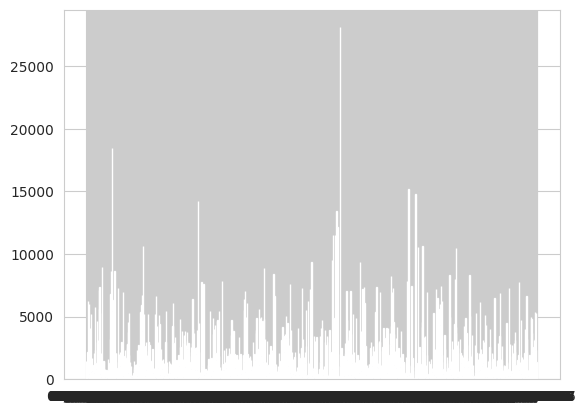

In [466]:
plt.bar(total_vendas_data.index, total_vendas_data.values)

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [467]:
df_dsa.head(2)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94


In [468]:
total_vendas_estado = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()

In [469]:
total_vendas_estado = total_vendas_estado.sort_values(by='Valor_Venda', ascending=False).reset_index(drop=True)

In [470]:
total_vendas_estado.head()

,Estado,Valor_Venda
0,California,442927.0975
1,New York,304536.4010
2,Texas,163549.8602
3,Washington,133826.0060
4,Pennsylvania,114411.6800


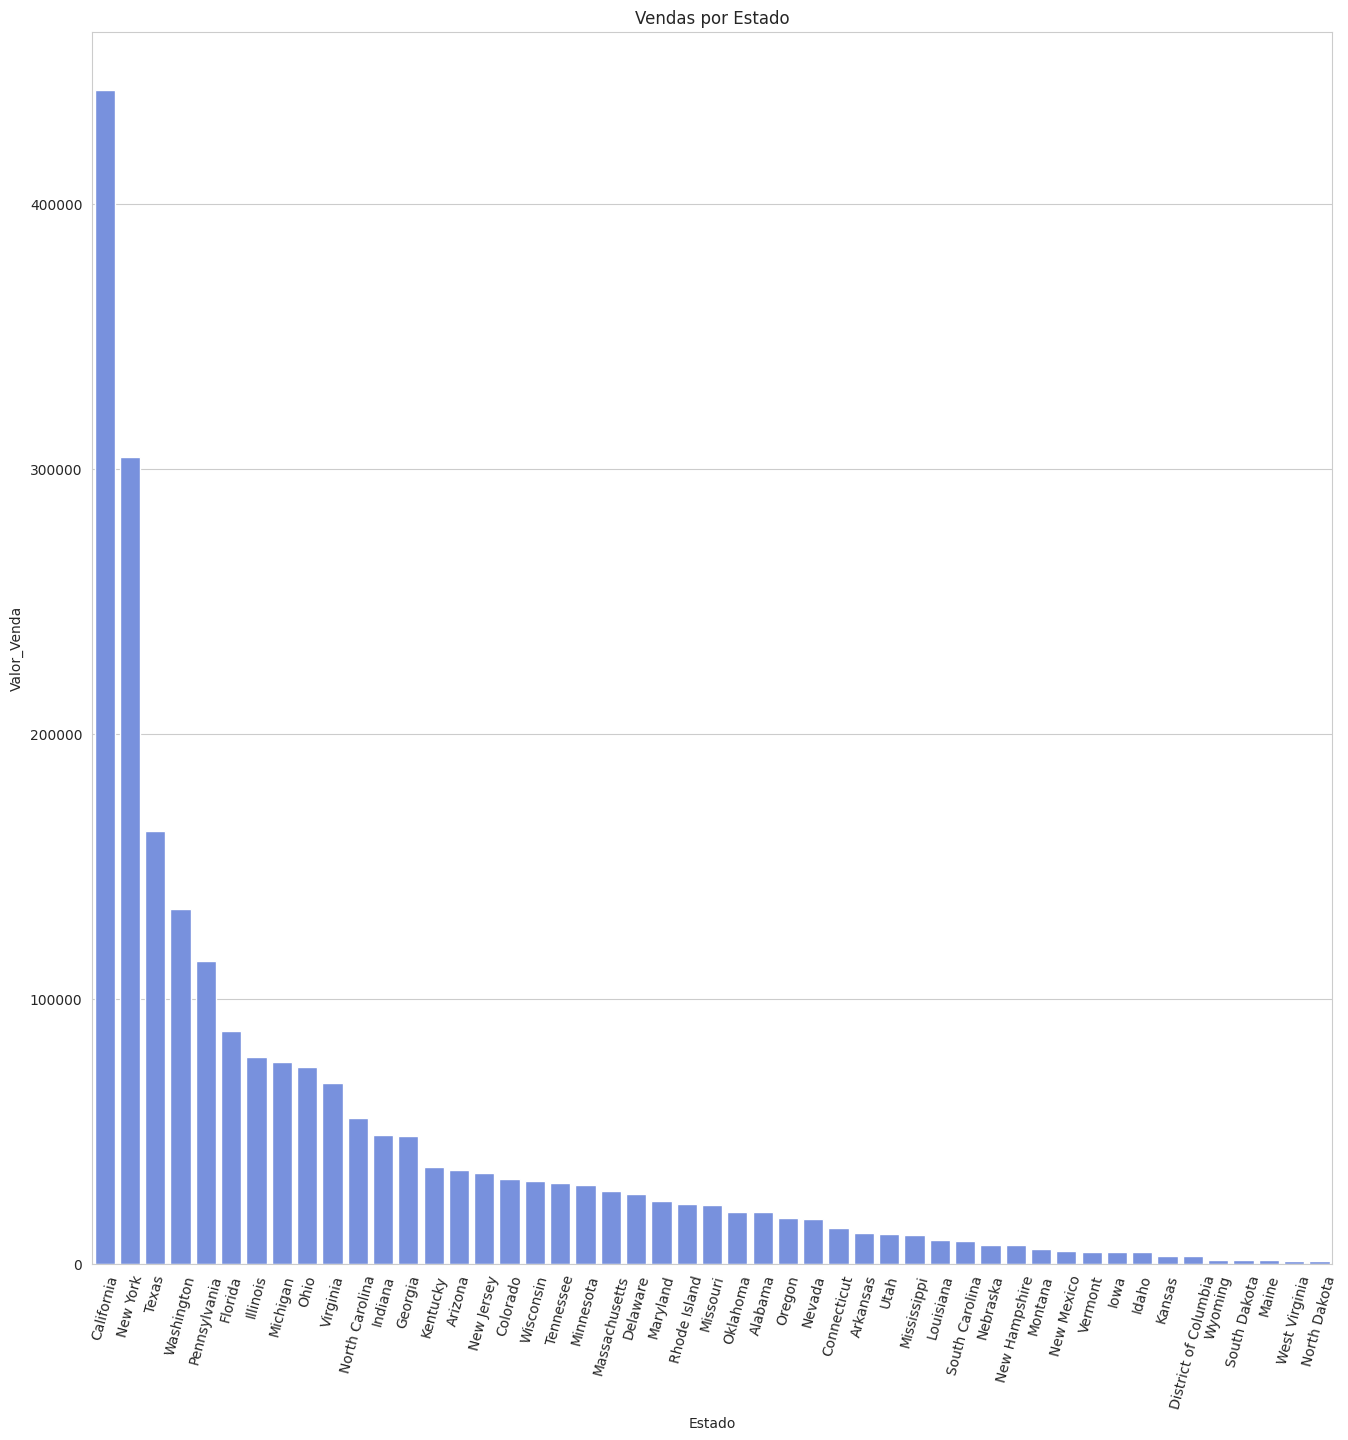

In [471]:
plt.figure(figsize=(16, 16))
sns.barplot(data = total_vendas_estado,
             y = 'Valor_Venda',
            x = 'Estado').set(title = 'Vendas por Estado')
           
plt.xticks(rotation = 75)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [472]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [473]:
dez_cidade_total_venda = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False).head(10)

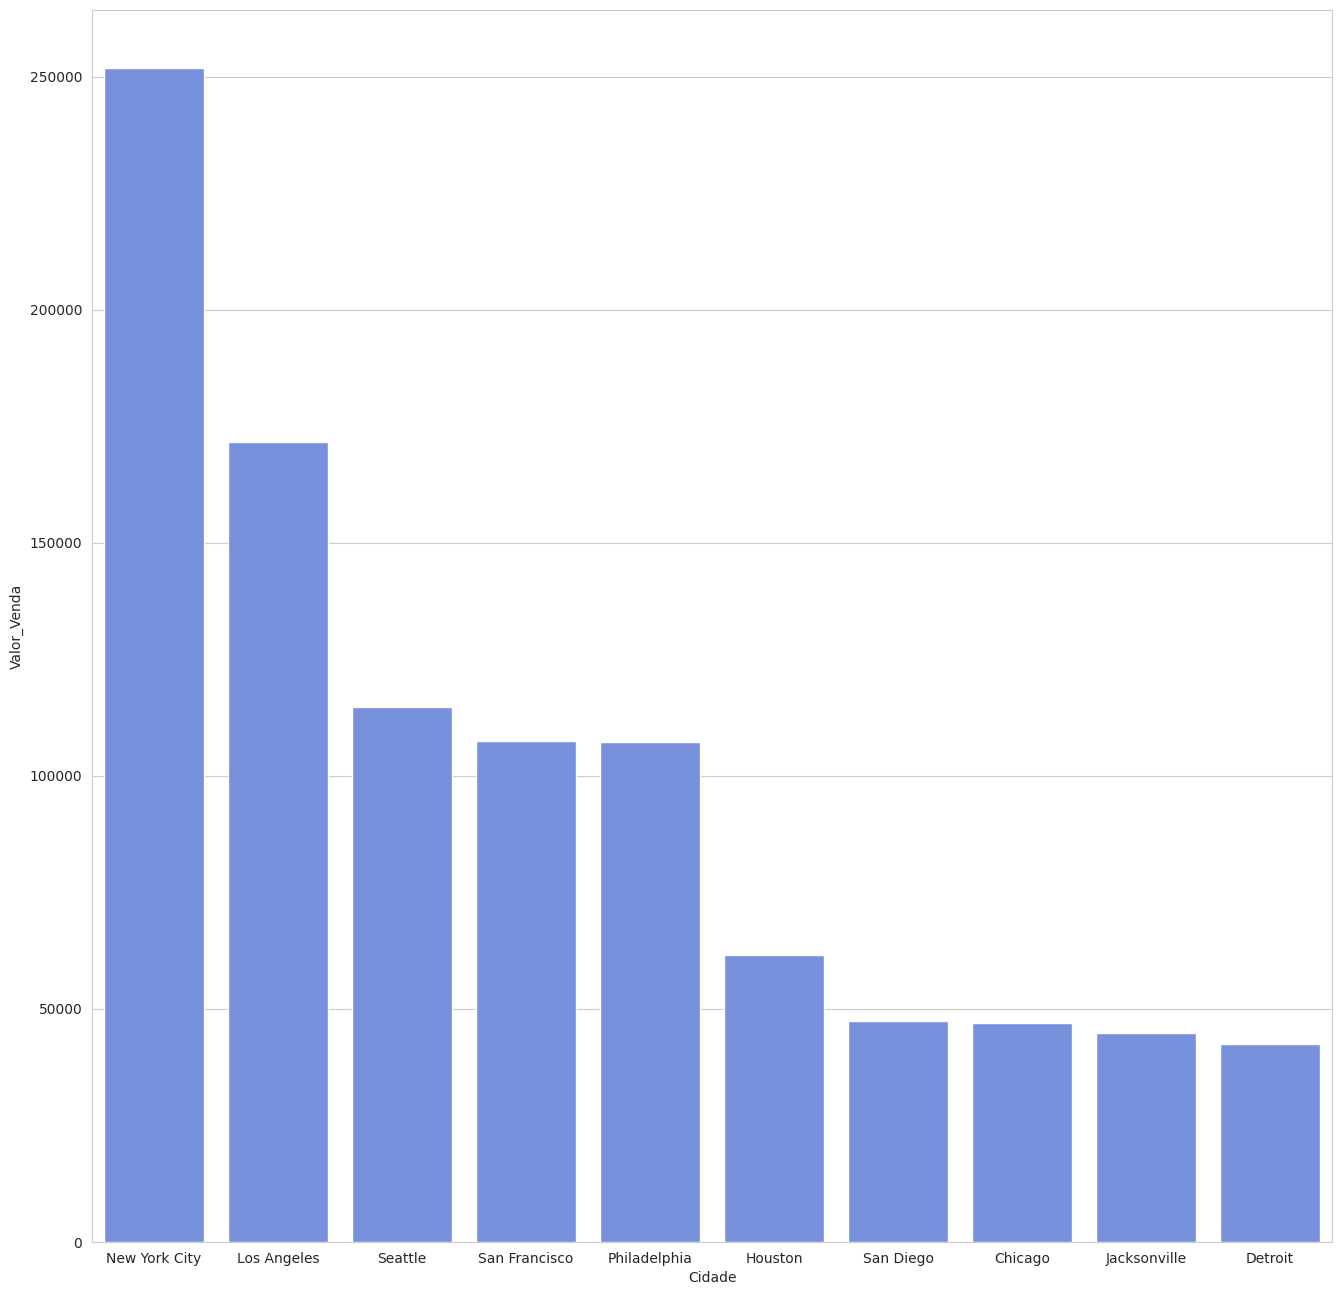

In [474]:
plt.figure(figsize=(16, 16))
sns.set_palette('coolwarm')
sns.barplot(data = dez_cidade_total_venda,
            y = 'Valor_Venda',
            x = 'Cidade')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [475]:
vendas_segmento = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False)

In [476]:
vendas_segmento.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


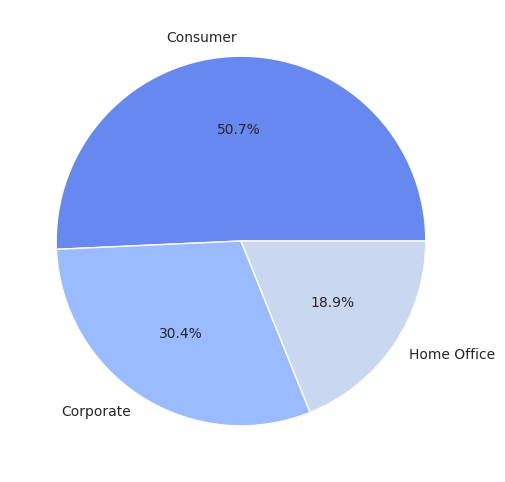

In [477]:
sns.set_style("whitegrid") 
plt.figure(figsize=(6,6))
plt.pie(vendas_segmento['Valor_Venda'], labels=vendas_segmento['Segmento'], autopct='%1.1f%%')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [478]:
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], errors='coerce')

In [479]:
df_dsa['ANO'] = df_dsa['Data_Pedido'].dt.year

In [480]:
vendas_segmento_ano = df_dsa.groupby(['ANO', 'Segmento'])['Valor_Venda'].sum().reset_index().sort_values('ANO', ascending=False).round(2)

In [481]:
vendas_segmento_ano['ANO'] = vendas_segmento_ano['ANO'].astype(int)

In [482]:
vendas_segmento_ano.reset_index(drop=True)
vendas_segmento_ano.head(1000)

,ANO,Segmento,Valor_Venda
11,2018,Home Office,62977.61
9,2018,Consumer,101631.29
10,2018,Corporate,100342.74
7,2017,Corporate,74093.50
6,2017,Consumer,139367.32
8,2017,Home Office,52379.42
4,2016,Corporate,42678.15
3,2016,Consumer,81699.10
5,2016,Home Office,33443.36
2,2015,Home Office,28558.42


In [483]:
vendas_segmento_ano = df_dsa.groupby(['ANO', 'Segmento'])['Valor_Venda'].sum()

In [484]:
vendas_segmento_ano

ANO     Segmento   
2015.0  Consumer       104367.8465
        Corporate       41624.6582
        Home Office     28558.4190
2016.0  Consumer        81699.0991
        Corporate       42678.1536
        Home Office     33443.3600
2017.0  Consumer       139367.3224
        Corporate       74093.4995
        Home Office     52379.4230
2018.0  Consumer       101631.2890
        Corporate      100342.7368
        Home Office     62977.6145
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [485]:
df_dsa.head(1)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,ANO
0,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017.0


In [486]:
desconto_15 = df_dsa[df_dsa['Valor_Venda'] > 1000].reset_index()

In [487]:
desconto_15['Valor_Venda'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 457 entries, 0 to 456
Series name: Valor_Venda
Non-Null Count  Dtype  
--------------  -----  
457 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [488]:
df_dsa.head(2)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,ANO
0,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017.0
1,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017.0


In [489]:
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.10)

In [490]:
df_dsa1 = df_dsa[df_dsa['Valor_Venda'] > 1000]

In [491]:
desconto0 = df_dsa1['Valor_Venda'].mean().round(2)

In [492]:
desconto_15_aplicado = df_dsa1['Valor_Venda'] - df_dsa1['Valor_Venda'] * 0.15

In [493]:
desconto15 = desconto_15_aplicado.mean().round(2)

In [494]:
print(f'A média sem o desconto é de US$ {desconto0}, aplicando o desconto de 15% a média vai para o valor de US$ {desconto15}')

A média sem o desconto é de US$ 2116.81, aplicando o desconto de 15% a média vai para o valor de US$ 1799.29


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [497]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,ANO,Desconto,MÊS
0,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017.0,0.1,8.0
1,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017.0,0.1,8.0
2,CA-2017-138688,2017-12-06,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017.0,0.1,12.0
3,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016.0,0.1,11.0
4,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016.0,0.1,11.0


In [496]:
df_dsa['MÊS'] = df_dsa['Data_Pedido'].dt.month

In [546]:
vendas_segmento_ano_mes = df_dsa.groupby(['ANO', 'MÊS', 'Segmento'])['Valor_Venda'].sum().reset_index().sort_values(['ANO', 'MÊS']).reset_index(drop=True).round(2)

In [543]:
# vendas_segmento_ano_mes = df_dsa.groupby(['ANO', 'MÊS', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median]).reset_index().sort_values(['ANO', 'MÊS']).reset_index(drop=True).round(2)

/tmp/ipykernel_37306/1071994647.py:1: FutureWarning: The provided callable <function sum at 0x7d7803f4f9c0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  vendas_segmento_ano_mes = df_dsa.groupby(['ANO', 'MÊS', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median]).reset_index().sort_values(['ANO', 'MÊS']).reset_index(drop=True).round(2)
/tmp/ipykernel_37306/1071994647.py:1: FutureWarning: The provided callable <function mean at 0x7d7803f74ae0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  vendas_segmento_ano_mes = df_dsa.groupby(['ANO', 'MÊS', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median]).reset_index().sort_values(['ANO', 'MÊS']).reset_index(drop=True).round(2)
/tmp/ipykernel_37306/1071994647.py:1: FutureWarning: 

In [547]:
vendas_segmento_ano_mes.head()

,ANO,MÊS,Segmento,Valor_Venda
0,2015.0,1.0,Consumer,11765.46
1,2015.0,1.0,Corporate,2966.67
2,2015.0,1.0,Home Office,4814.03
3,2015.0,2.0,Consumer,7650.48
4,2015.0,2.0,Corporate,2149.08


In [548]:
vendas_segmento_ano_mes['ANO_MES'] = vendas_segmento_ano_mes['ANO'].astype(str) + '-' + vendas_segmento_ano_mes['MÊS'].astype(str)

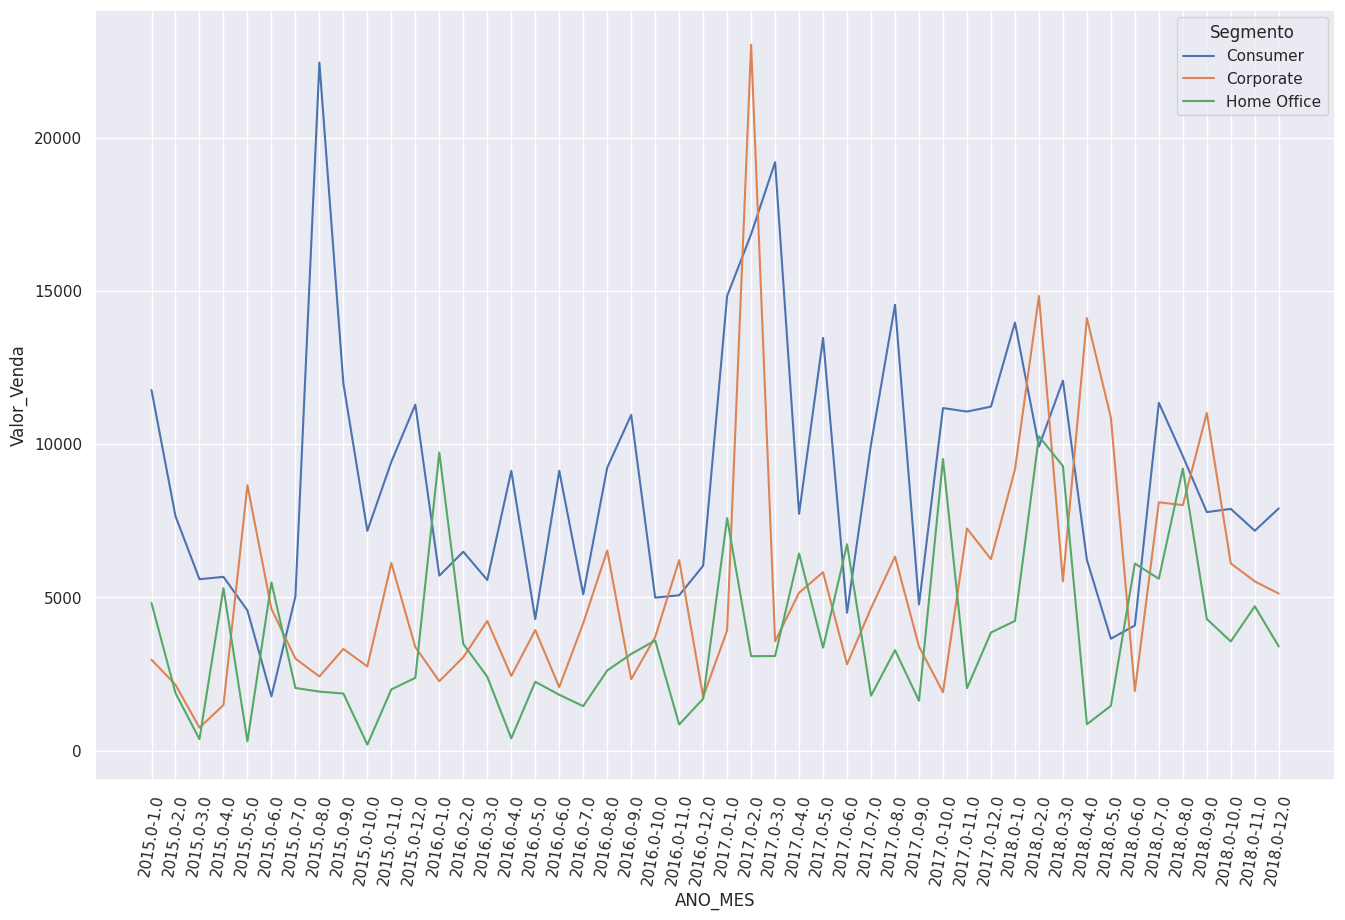

In [569]:
sns.set()
plt.figure(figsize=(16,10))
fig1 = sns.lineplot(data=vendas_segmento_ano_mes,
            x='ANO_MES',
            y='Valor_Venda',
            hue='Segmento',
            markers='o',    
            )
plt.xticks(rotation=80)
plt.show()


<Figure size 1600x1000 with 0 Axes>

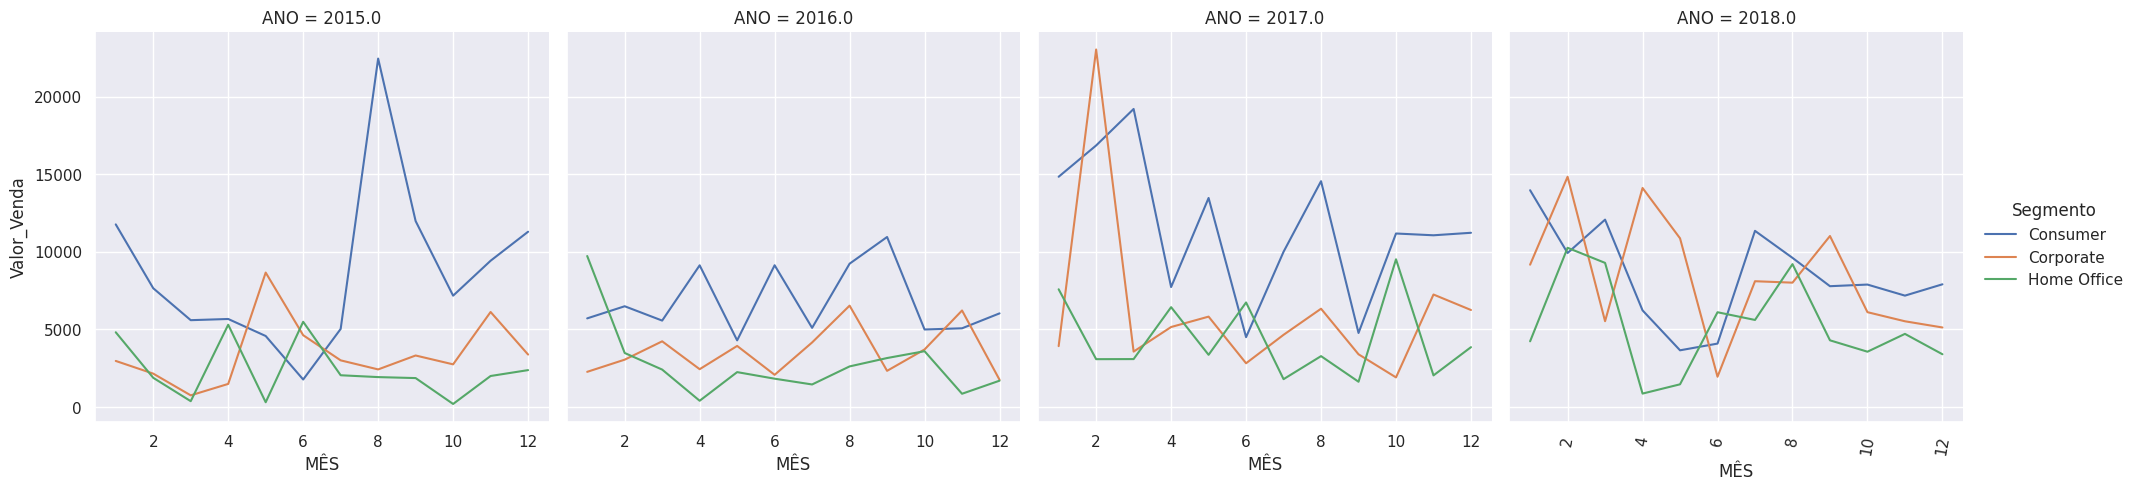

In [568]:
sns.set()
plt.figure(figsize=(16,10))
fig1 = sns.relplot(data=vendas_segmento_ano_mes,
            kind='line',
            x='MÊS',
            y='Valor_Venda',
            hue='Segmento',
            markers='o',  
            col = 'ANO',
            col_wrap= 4
            )
plt.xticks(rotation=80)
plt.show()


## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [570]:
df_dsa.head(2)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,ANO,Desconto,MÊS
0,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017.0,0.1,8.0
1,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017.0,0.1,8.0


In [582]:
df_dsa['SubCategoria'].nunique()

17

In [598]:
top_12 = df_dsa.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum().reset_index().sort_values('Valor_Venda', ascending=False).head(12).reset_index(drop=True)

In [586]:
top12 = ['Phones', 'Chairs', 'Storage', 'Tables', 'Binders', 'Machines', 'Accessories', 'Copiers', 'Bookcases', 'Appliances', 'Furnishings', 'Paper']

In [609]:
results = df_dsa.groupby(['SubCategoria', 'Categoria'])['Valor_Venda'].sum().reset_index().sort_values('Valor_Venda', ascending=False).head(12).reset_index(drop=True).round(2)

In [610]:
results.sort_values('Categoria')

,SubCategoria,Categoria,Valor_Venda
1,Chairs,Furniture,317919.62
3,Tables,Furniture,202083.36
8,Bookcases,Furniture,108045.05
10,Furnishings,Furniture,88862.77
2,Storage,Office Supplies,216188.36
4,Binders,Office Supplies,194723.38
9,Appliances,Office Supplies,104061.69
11,Paper,Office Supplies,76312.76
0,Phones,Technology,325271.29
5,Machines,Technology,189238.63


In [617]:
cateogira_apenas = results.groupby('Categoria').sum(numeric_only=True).reset_index().sort_values('Valor_Venda', ascending=False)

In [618]:
cateogira_apenas.head()

,Categoria,Valor_Venda
2,Technology,823549.37
0,Furniture,716910.80
1,Office Supplies,591286.19


# Fim